# Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

df = pd.read_csv ("2023 QS.csv")
df

Rank                                       institution location code  \
0        1      Massachusetts Institute of Technology (MIT)             US   
1        2                           University of Cambridge            UK   
2        3                               Stanford University            US   
3        4                              University of Oxford            UK   
4        5                                Harvard University            US   
...    ...                                               ...           ...   
1417  1418  Universidad Nacional Autónoma de Honduras (UNAH)            HN   
1418  1419                Universidad Tecnológica de Bolívar            CO   
1419  1420                    Université Mohammed V de Rabat            MA   
1420  1421                             University of Craiova            RO   
1421  1422                              University of Oradea            RO   

            location  ar score ar rank  er score er rank  fsr score fsr rank  \
0      United States     100.0       5     100.0       4      100.0       14   
1     United Kingdom     100.0       2     100.0       2      100.0       11   
2      United States     100.0       4     100.0       5      100.0        6   
3     United Kingdom     100.0       3     100.0       3      100.0        8   
4      United States     100.0       1     100.0       1       99.4       35   
...              ...       ...     ...       ...     ...        ...      ...   
1417        Honduras       4.6    501+       5.8    501+        3.6     601+   
1418        Colombia       3.0    501+       5.8    501+        2.4     601+   
1419         Morocco       2.8    501+       2.6    501+        3.2     601+   
1420         Romania       3.3    501+       1.8    501+        2.7     601+   
1421         Romania       4.0    501+       2.1    501+        3.3     601+   

      ...  cpf rank ifr score  ifr rank isr score  isr rank irn score  \
0     ...         5     100.0        54      90.0       109      96.1   
1     ...        55     100.0        60      96.3        70      99.5   
2     ...         9      99.8        74      60.3       235      96.3   
3     ...        64      98.8       101      98.4        54      99.9   
4     ...         2      76.9       228      66.9       212     100.0   
...   ...       ...       ...       ...       ...       ...       ...   
1417  ...      601+       1.7      601+       NaN       NaN       8.1   
1418  ...      601+       9.3      601+       1.3      601+       8.8   
1419  ...      601+       5.2      601+       2.8      601+      51.1   
1420  ...      601+       NaN       NaN       NaN       NaN       7.5   
1421  ...      601+       1.7      601+       7.9      601+      16.6   

      irn rank ger score  ger rank score scaled  
0           58     100.0         3          100  
1            6     100.0         9         98.8  
2           55     100.0         2         98.5  
3            3     100.0         7         98.4  
4            1     100.0         1         97.6  
...        ...       ...       ...          ...  
1417      601+       NaN       NaN            -  
1418      601+      30.9       403            -  
1419      601+       NaN       NaN            -  
1420      601+       8.7      601+            -  
1421      601+       9.7      601+            -  

[1422 rows x 21 columns]

# Limpieza y verificacion de correlaciones

In [ ]:
df.dtypes

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank           object
er score         float64
er rank           object
fsr score        float64
fsr rank          object
cpf score        float64
cpf rank          object
ifr score        float64
ifr rank          object
isr score        float64
isr rank          object
irn score        float64
irn rank          object
ger score        float64
ger rank          object
score scaled      object
dtype: object

In [ ]:
column_names = df.columns
print(column_names)

Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')


In [ ]:
column_names = df.columns
print(column_names)


#Las columnas que pertenecen a ranks y esta universidad cuente con un posicion mayor a 601 aparece como 601+
#Por lo cual reemplacaremos estos por un valor outlier

df['ar rank']  = df["ar rank"].replace(["501+"],[10000] )
df['er rank']  = df["er rank"].replace(["501+"],[10000] )
df['fsr rank'] = df["fsr rank"].replace(["501+"],[10000] )
df['cpf rank'] = df["cpf rank"].replace(["501+"],[10000] )
df['ifr rank'] = df["ifr rank"].replace(["501+"],[10000] )
df['isr rank'] = df["isr rank"].replace(["501+"],[10000] )
df['irn rank'] = df["irn rank"].replace(["501+"],[10000] )
df['ger rank'] = df["ger rank"].replace(["501+"],[10000] )

df['ar rank']  = df["ar rank"].replace(["601+"],[10000] )
df['er rank']  = df["er rank"].replace(["601+"],[10000] )
df['fsr rank'] = df["fsr rank"].replace(["601+"],[10000] )
df['cpf rank'] = df["cpf rank"].replace(["601+"],[10000] )
df['ifr rank'] = df["ifr rank"].replace(["601+"],[10000] )
df['isr rank'] = df["isr rank"].replace(["601+"],[10000] )
df['irn rank'] = df["irn rank"].replace(["601+"],[10000] )
df['ger rank'] = df["ger rank"].replace(["601+"],[10000] )

columnas_a_rellenar1 = ['ar rank', 'er rank', 'fsr rank', 'cpf rank', 'ifr rank', 'isr rank', 'irn rank', 'ger rank']


columnas_a_rellenar2 = ['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score',  'ger score']


#Estos se rellenan con valores atipicos fuera del rango, en este caso colocandose 1000000 a los ranks que originalmente son NaN
df[columnas_a_rellenar1] = df[columnas_a_rellenar1].fillna("1000000")
#Estos se rellenan con valores atipicos fuera del rango, en este caso colocandose 0 a los score que originalmente son NaN
df[columnas_a_rellenar2] = df[columnas_a_rellenar2].fillna("0")

df['ar rank'] = df['ar rank'].astype(int)
df['er rank'] = df['er rank'].astype(int)
df['fsr rank'] = df['fsr rank'].astype(int)
df['cpf rank'] = df['cpf rank'].astype(int)
df['ifr rank'] = df['ifr rank'].astype(int)
df['isr rank'] = df['isr rank'].astype(int)
df['irn rank'] = df['irn rank'].astype(int)
df['ger rank'] = df['ger rank'].astype(int)

df['ar score'] = df['ar score'].astype(float)
df['er score'] = df['er score'].astype(float)
df['fsr score'] = df['fsr score'].astype(float)
df['cpf score'] = df['cpf score'].astype(float)
df['ifr score'] = df['ifr score'].astype(float)
df['isr score'] = df['isr score'].astype(float)
df['irn score'] = df['irn score'].astype(float)
df['ger score'] = df['ger score'].astype(float)


Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')


In [ ]:
#Vamos a tratar de eliminar un inconveniente con el dato df['score scaled'] = df['score scaled'].astype(float) ya que, este dato oriinalmente
#Se trata de un sting con elements - que seran reemplados y el dominio del resto de datos es de  24.2 a 100, estos se reemplazaran con 0

df['score scaled'] = df["score scaled"].replace(["-"],[0] )
df['score scaled'] = df['score scaled'].astype(float)

In [ ]:
df.isnull().sum()

Rank             0
institution      0
location code    0
location         0
ar score         0
ar rank          0
er score         0
er rank          0
fsr score        0
fsr rank         0
cpf score        0
cpf rank         0
ifr score        0
ifr rank         0
isr score        0
isr rank         0
irn score        0
irn rank         0
ger score        0
ger rank         0
score scaled     0
dtype: int64

In [ ]:
df.dtypes

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank            int64
er score         float64
er rank            int64
fsr score        float64
fsr rank           int64
cpf score        float64
cpf rank           int64
ifr score        float64
ifr rank           int64
isr score        float64
isr rank           int64
irn score        float64
irn rank           int64
ger score        float64
ger rank           int64
score scaled     float64
dtype: object

<ipython-input-17-0a12d31f728c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


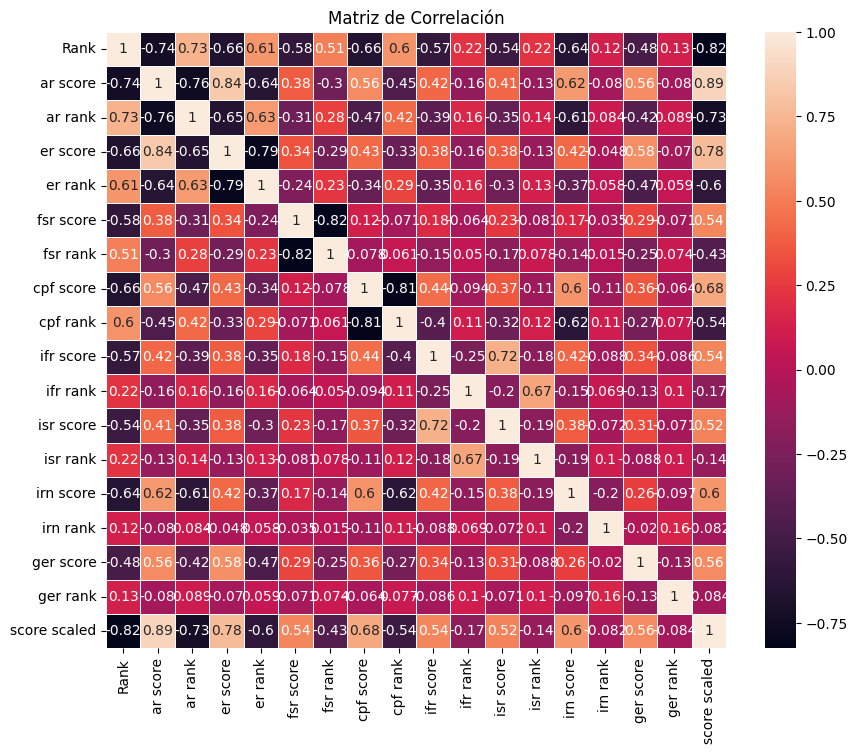

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
df.describe()

Rank     ar score       ar rank     er score       er rank  \
count  1422.000000  1422.000000   1422.000000  1422.000000   1422.000000   
mean    711.500000    20.124684   6571.889592    20.642616   6571.894515   
std     410.640354    22.802706   4657.591711    24.025717   4657.584965   
min       1.000000     1.000000      1.000000     0.000000      1.000000   
25%     356.250000     5.400000    356.250000     4.400000    356.250000   
50%     711.500000    10.800000  10000.000000    10.250000  10000.000000   
75%    1066.750000    23.775000  10000.000000    26.950000  10000.000000   
max    1422.000000   100.000000  10000.000000   100.000000  10000.000000   

         fsr score      fsr rank    cpf score      cpf rank    ifr score  \
count  1422.000000   1422.000000  1422.000000   1422.000000  1422.000000   
mean     29.954923   5907.383966    24.443108   5900.695499    29.477637   
std      28.174827   4793.291008    27.899638   4794.211952    33.933455   
min       0.000000      1.000000     0.000000      1.000000     0.000000   
25%       8.200000    356.250000     3.000000    356.250000     3.700000   
50%      18.200000  10000.000000    10.950000  10000.000000    11.300000   
75%      43.475000  10000.000000    39.200000  10000.000000    48.975000   
max     100.000000  10000.000000   100.000000  10000.000000   100.000000   

             ifr rank    isr score        isr rank    irn score  \
count     1422.000000  1422.000000     1422.000000  1422.000000   
mean     74135.174402    25.481294    45590.928270    49.116948   
std     252025.050821    30.715729   195157.596366    30.435110   
min          1.000000     0.000000        1.000000     0.000000   
25%        356.250000     2.900000      356.250000    21.200000   
50%      10000.000000     9.700000    10000.000000    46.800000   
75%      10000.000000    38.625000    10000.000000    77.375000   
max    1000000.000000   100.000000  1000000.000000   100.000000   

             irn rank    ger score        ger rank  score scaled  
count     1422.000000  1422.000000     1422.000000   1422.000000  
mean     14958.016878    25.965823    14261.814346     15.688959  
std      94771.144298    26.199984    91094.827697     24.008663  
min          1.000000     0.000000        1.000000      0.000000  
25%        356.250000     6.525000      356.250000      0.000000  
50%      10000.000000    15.400000    10000.000000      0.000000  
75%      10000.000000    36.300000    10000.000000     30.700000  
max    1000000.000000   100.000000  1000000.000000    100.000000

# Seccion de graficacion

In [ ]:
variables_a_incluir = [col for col in df.columns if 'rank' not in col and col not in ('Rank', 'institution', 'location code', 'location')]
variables_a_incluir

['Rank',
 'ar score',
 'er score',
 'fsr score',
 'cpf score',
 'ifr score',
 'isr score',
 'irn score',
 'ger score',
 'score scaled']

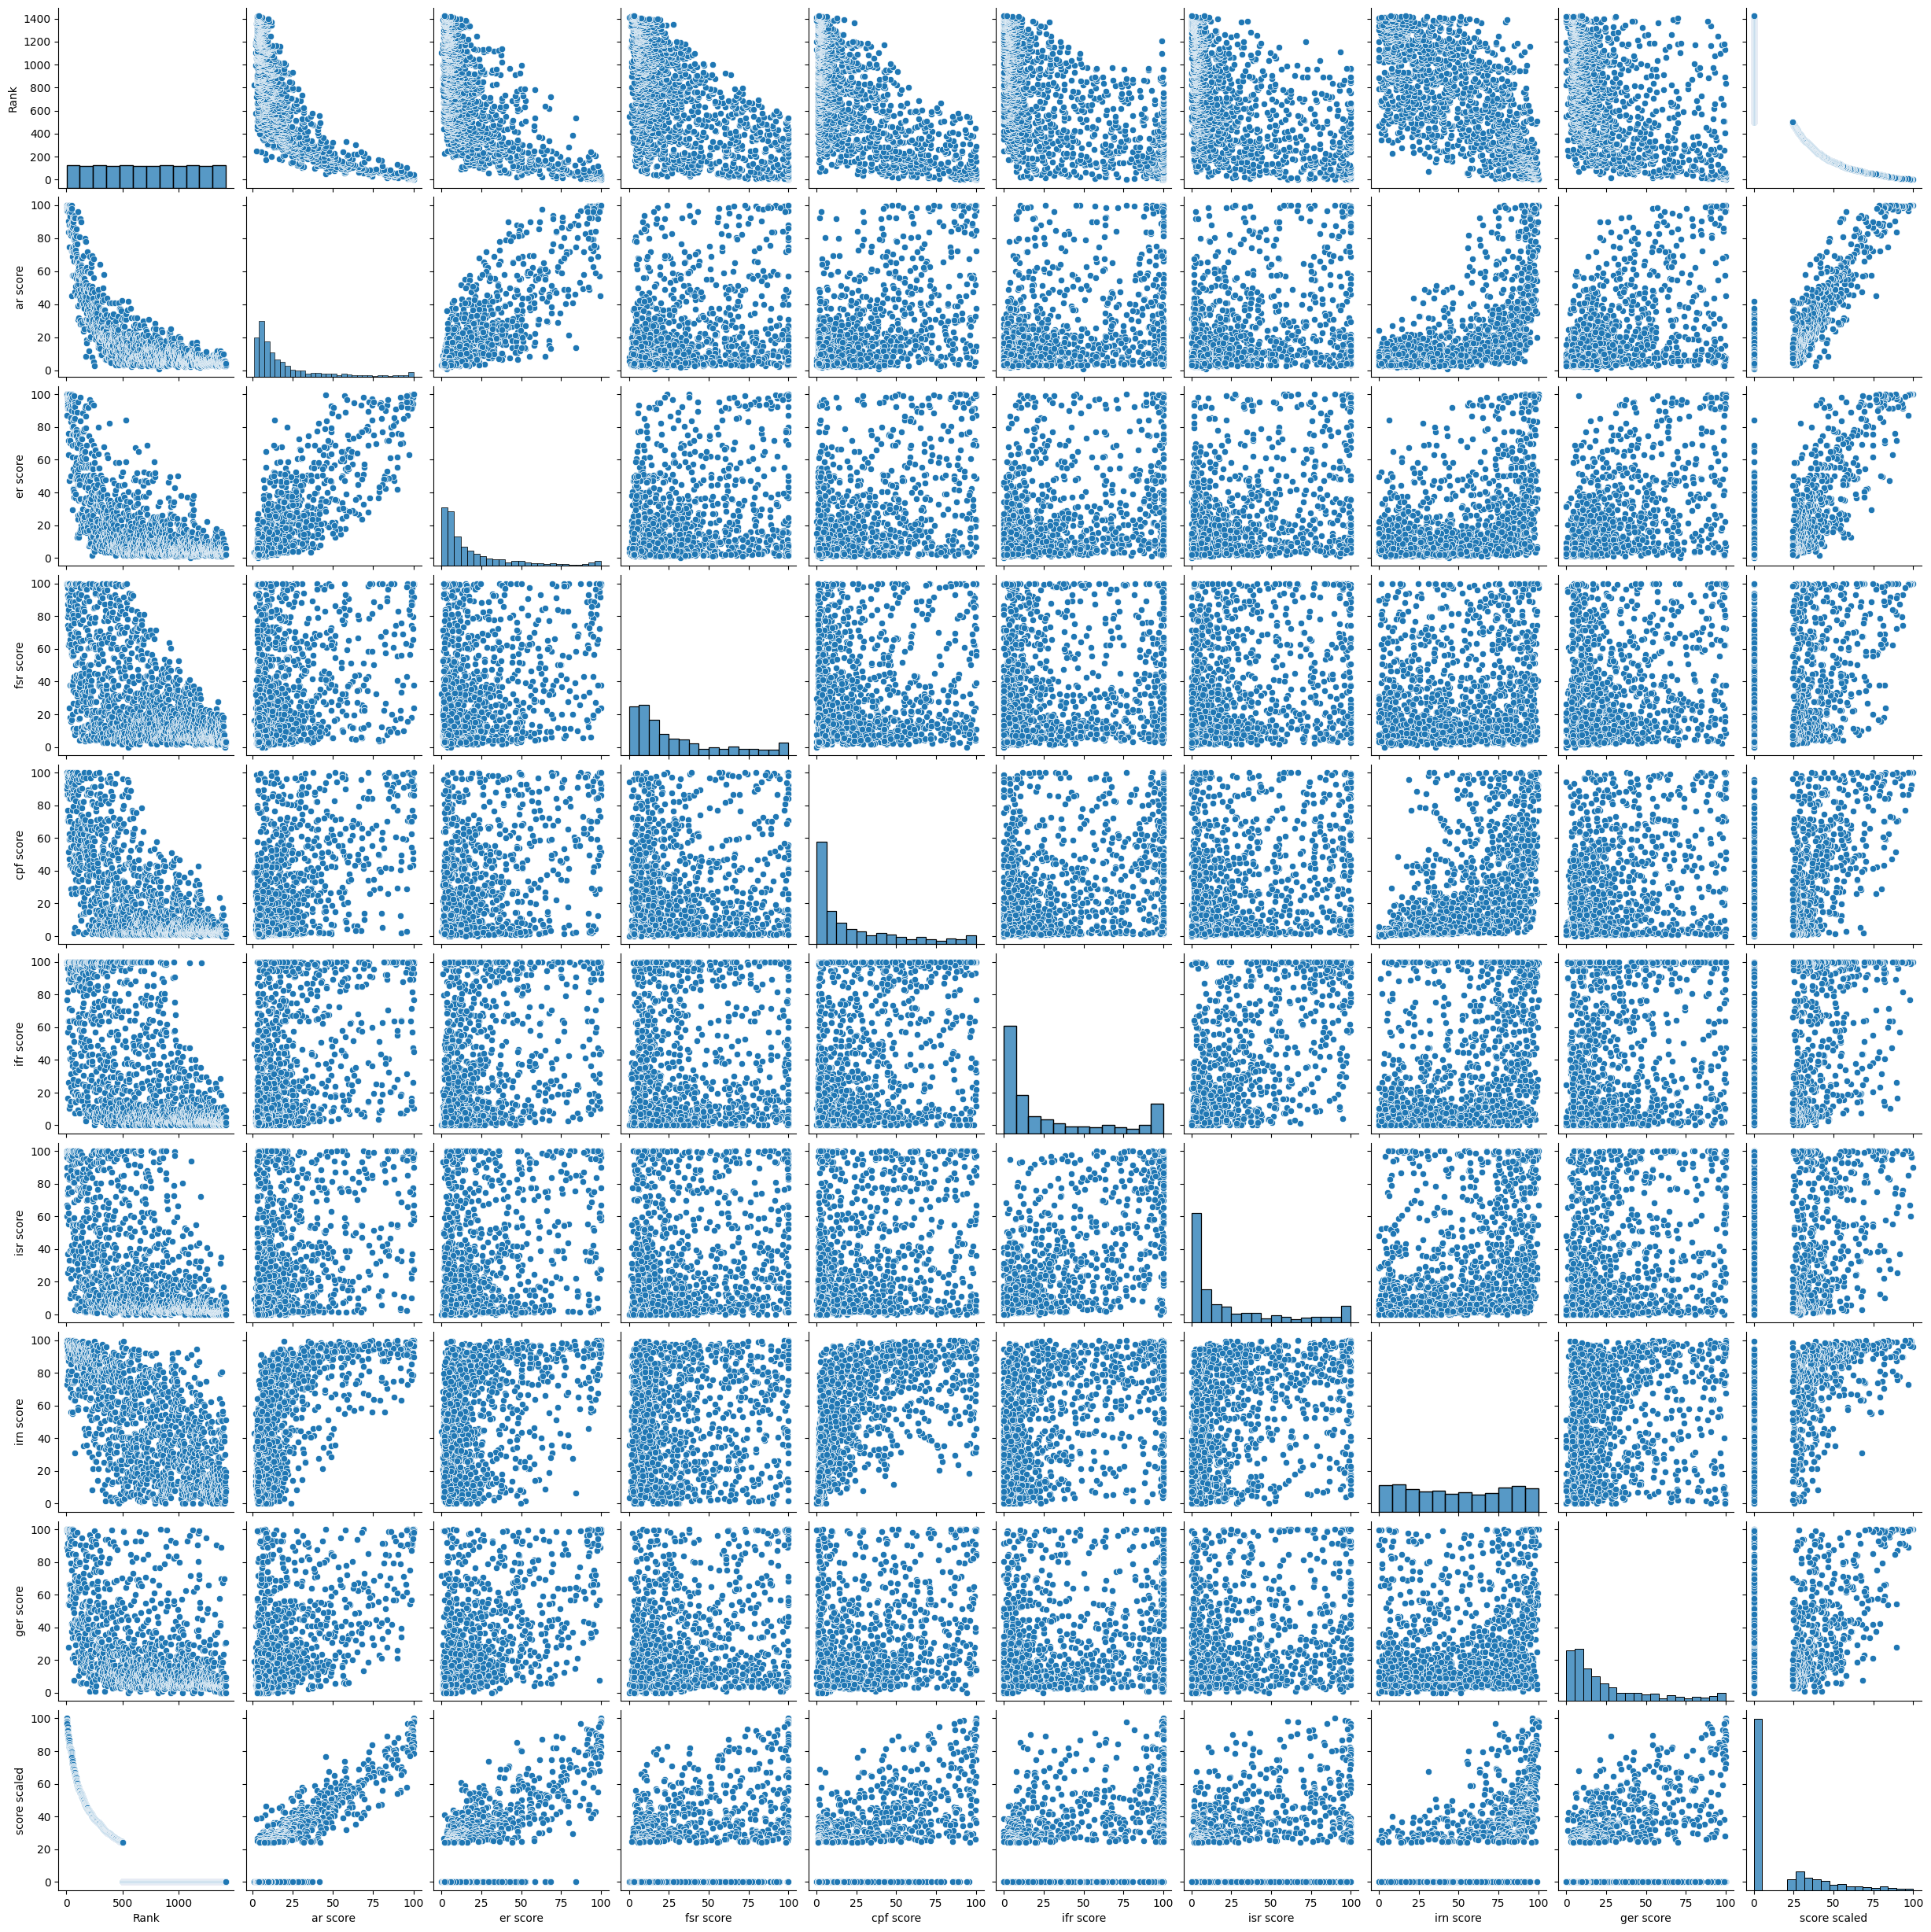

In [ ]:
sns.pairplot(df, vars = ["Rank",'ar score', 'er score','fsr score','cpf score','ifr score','isr score','irn score','ger score','score scaled' ])

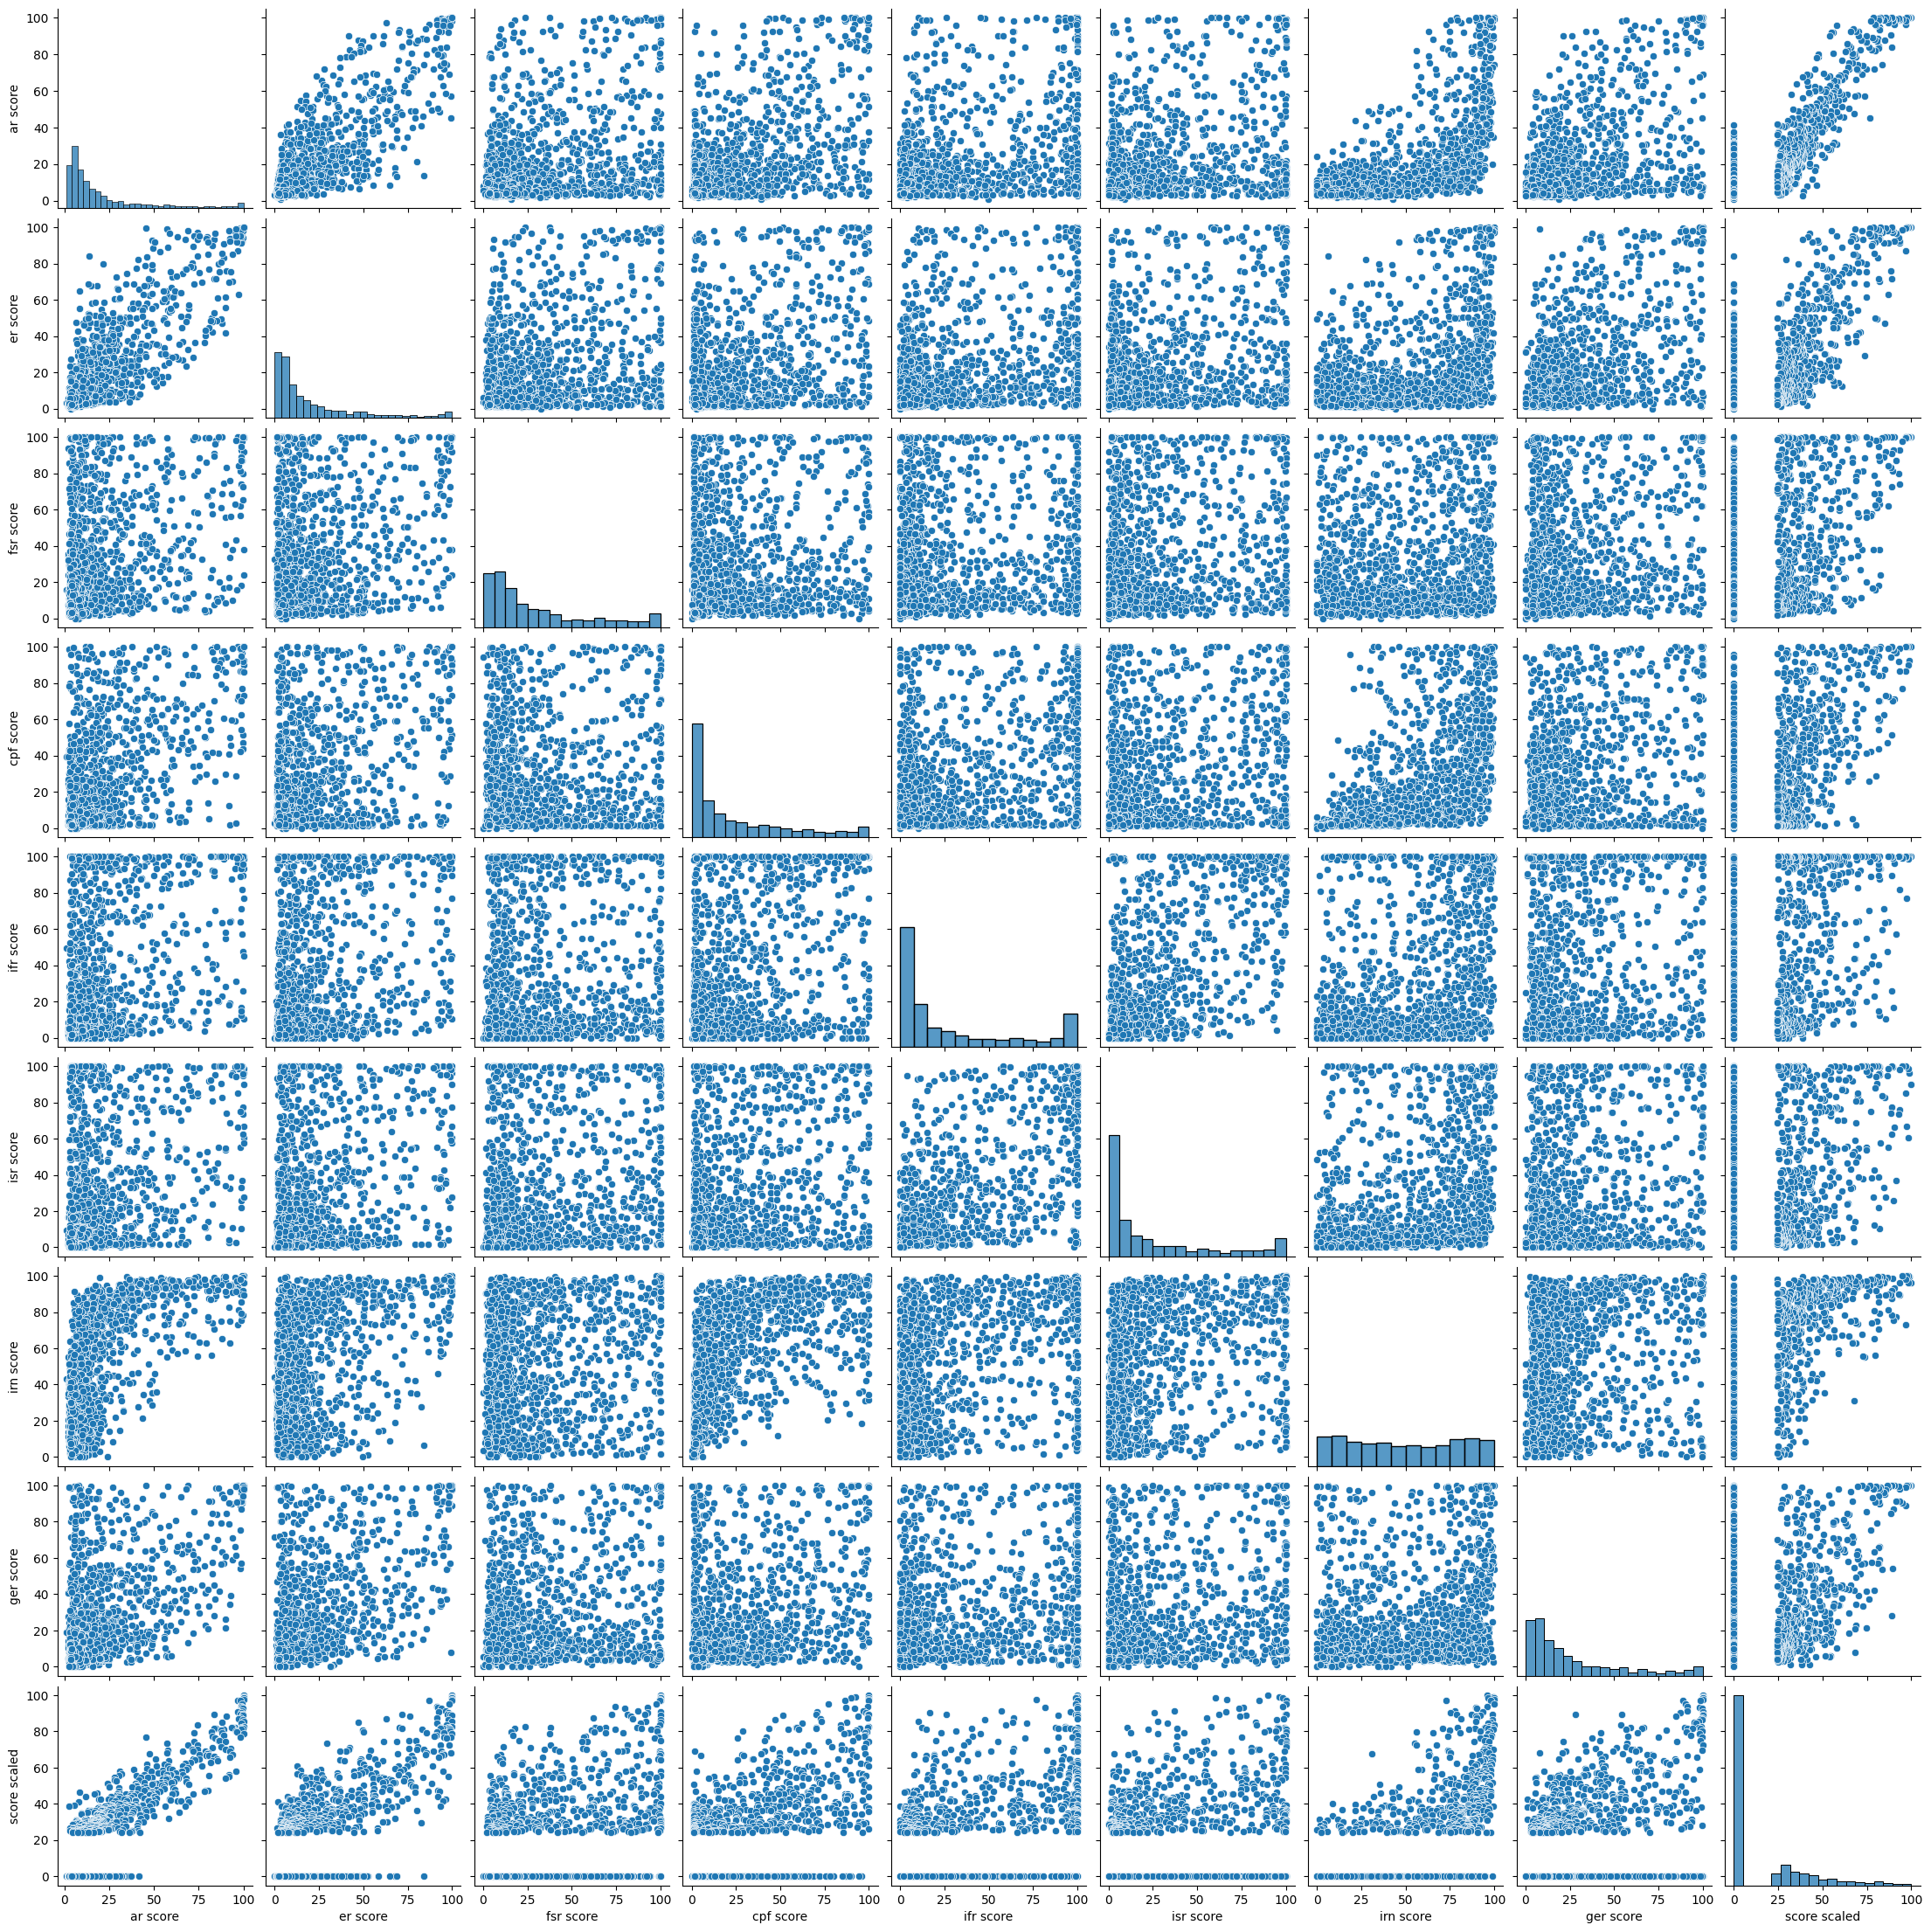

In [ ]:
sns.pairplot(df[variables_a_incluir])
plt.show()


# Creador de modelo de RandomForest con Kfolds para regresion ordenada

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")



No. of training examples: 1137
No. of testing examples: 285


In [ ]:


x_train=train.drop('Rank',axis=1)
y_train=train[['Rank']]

x_test=test.drop('Rank',axis=1)
y_test=test[['Rank']]

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((1137, 20), (1137, 1), (285, 20), (285, 1))

In [ ]:
a= 1137
b= 285

z=a+b
print(z)

1422


In [ ]:
# Separar la variable objetivo 'Rank'
y =df['Rank']
# Seleccionar todas las columnas excepto 'Rank' como características
##X = df[['ar score','ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score', 'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank', 'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled']]
X1 =df.drop('Rank',axis=1)
X2 = X1.drop('institution', axis=1)
X3 = X2.drop('location', axis=1)
X4 = X3.drop('location code', axis=1)
X = X4.drop('score scaled', axis=1)
X.shape, y.shape

((1422, 16), (1422,))

In [ ]:
##
## Pruebas con validacion cruzada KFolds
##

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes tus datos en X (características) y y (objetivo)

# Definir el número de pliegues (folds)
num_folds = 6

# Inicializar el validador cruzado (cross-validator) KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Inicializar una lista para almacenar las puntuaciones de validación
scores = []

# Iterar a través de los pliegues
for train_index, test_index in kf.split(X):
    # Dividir los datos en conjuntos de entrenamiento y prueba para este pliegue
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear y entrenar el modelo de Random Forest
    rf_model = RandomForestRegressor(max_depth=5, random_state=0)
    rf_model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de prueba y guardar la puntuación
    score = rf_model.score(X_test, y_test)
    scores.append(score)

# Calcular el promedio de las puntuaciones de validación cruzada
mean_score = sum(scores) / num_folds

print("Puntuaciones de Validación Cruzada:", scores)
print("Puntuación Promedio de Validación Cruzada:", mean_score)

Puntuaciones de Validación Cruzada: [0.917753141330388, 0.9237516083026364, 0.9433678556066215, 0.941189390613766, 0.9357588594048747, 0.9339543840212396]
Puntuación Promedio de Validación Cruzada: 0.9326292065465877


#Analisis Respecto a Mexico

In [ ]:
mx = df[df['location'] == 'Mexico']
mx

Rank                                        institution location code  \
104    105     Universidad Nacional Autónoma de México (UNAM)            MX   
169    170                           Tecnológico de Monterrey            MX   
401    402                                  Colegio de México            MX   
546    547                      Universidad Panamericana (UP)            MX   
636    637                         Universidad Anáhuac México            MX   
730    731                   Universidad Iberoamericana IBERO            MX   
764    765               Instituto Politécnico Nacional (IPN)            MX   
765    766    Instituto Tecnológico Autónomo de México (ITAM)            MX   
784    785                      Universidad Autónoma Chapingo            MX   
845    846          ITESO, Universidad Jesuita de Guadalajara            MX   
913    914  Universidad Autónoma del Estado de Hidalgo (UAEH)            MX   
914    915  Universidad Autónoma del Estado de México (UAE...            MX   
915    916           Universidad Autónoma Metropolitana (UAM)            MX   
916    917                   Universidad de Guadalajara (UDG)            MX   
917    918         Universidad de las Américas Puebla (UDLAP)            MX   
1026  1027          Benemérita Universidad Autónoma de Puebla            MX   
1114  1115             Universidad Autónoma de Aguascalientes            MX   
1115  1116                 Universidad Autónoma de Nuevo León            MX   
1119  1120                    Universidad de Monterrey (UDEM)            MX   
1295  1296            Universidad Autónoma de Baja California            MX   
1297  1298            Universidad Autónoma de Querétaro (UAQ)            MX   
1298  1299         Universidad Autónoma de San Luis de Potosí            MX   
1299  1300                    Universidad Autonoma de Yucatan            MX   
1300  1301  Universidad Autónoma del Estado de Morelos (UAEM)            MX   
1311  1312                          Universidad de Guanajuato            MX   
1323  1324                              Universidad de Sonora            MX   
1329  1330              Universidad del Valle de Mexico (UVM)            MX   
1331  1332                        Universidad La Salle (ULSA)            MX   
1341  1342  Universidad Popular Autónoma del Estado de Pue...            MX   
1346  1347                            Universidad Veracruzana            MX   
1410  1411          Universidad Autónoma de Guadalajara (UAG)            MX   
1416  1417   Universidad Michoacana de San Nicolás de Hidalgo            MX   

     location  ar score  ar rank  er score  er rank  fsr score  fsr rank  ...  \
104    Mexico      96.0       31      95.1       32       43.2       358  ...   
169    Mexico      48.8      164      92.8       43       72.9       170  ...   
401    Mexico      14.9    10000       3.9    10000      100.0         1  ...   
546    Mexico       7.6    10000      29.3      330       78.2       148  ...   
636    Mexico      11.8    10000      33.1      294       55.3       282  ...   
730    Mexico      17.5      489      39.9      235       29.3       523  ...   
764    Mexico      20.0      422      50.9      164        9.2     10000  ...   
765    Mexico      14.2    10000      47.4      194       11.9     10000  ...   
784    Mexico       3.5    10000       2.5    10000       66.4       213  ...   
845    Mexico       5.7    10000       7.7    10000       44.1       348  ...   
913    Mexico       3.8    10000       7.7    10000       52.0       302  ...   
914    Mexico      21.7      385      11.2    10000        5.2     10000  ...   
915    Mexico      23.0      363      17.8    10000        5.1     10000  ...   
916    Mexico      20.3      414      11.9    10000       23.3     10000  ...   
917    Mexico       7.5    10000      18.4      493       35.4       439  ...   
1026   Mexico      14.9    10000       7.4    10000        4.3     10000  ...   
1114   Mexico       3

In [ ]:
mx = df[df['institution'] == 'Mexico']
mx

Rank                                        institution location code  \
104    105     Universidad Nacional Autónoma de México (UNAM)            MX   
169    170                           Tecnológico de Monterrey            MX   
401    402                                  Colegio de México            MX   
546    547                      Universidad Panamericana (UP)            MX   
636    637                         Universidad Anáhuac México            MX   
730    731                   Universidad Iberoamericana IBERO            MX   
764    765               Instituto Politécnico Nacional (IPN)            MX   
765    766    Instituto Tecnológico Autónomo de México (ITAM)            MX   
784    785                      Universidad Autónoma Chapingo            MX   
845    846          ITESO, Universidad Jesuita de Guadalajara            MX   
913    914  Universidad Autónoma del Estado de Hidalgo (UAEH)            MX   
914    915  Universidad Autónoma del Estado de México (UAE...            MX   
915    916           Universidad Autónoma Metropolitana (UAM)            MX   
916    917                   Universidad de Guadalajara (UDG)            MX   
917    918         Universidad de las Américas Puebla (UDLAP)            MX   
1026  1027          Benemérita Universidad Autónoma de Puebla            MX   
1114  1115             Universidad Autónoma de Aguascalientes            MX   
1115  1116                 Universidad Autónoma de Nuevo León            MX   
1119  1120                    Universidad de Monterrey (UDEM)            MX   
1295  1296            Universidad Autónoma de Baja California            MX   
1297  1298            Universidad Autónoma de Querétaro (UAQ)            MX   
1298  1299         Universidad Autónoma de San Luis de Potosí            MX   
1299  1300                    Universidad Autonoma de Yucatan            MX   
1300  1301  Universidad Autónoma del Estado de Morelos (UAEM)            MX   
1311  1312                          Universidad de Guanajuato            MX   
1323  1324                              Universidad de Sonora            MX   
1329  1330              Universidad del Valle de Mexico (UVM)            MX   
1331  1332                        Universidad La Salle (ULSA)            MX   
1341  1342  Universidad Popular Autónoma del Estado de Pue...            MX   
1346  1347                            Universidad Veracruzana            MX   
1410  1411          Universidad Autónoma de Guadalajara (UAG)            MX   
1416  1417   Universidad Michoacana de San Nicolás de Hidalgo            MX   

     location  ar score  ar rank  er score  er rank  fsr score  fsr rank  ...  \
104    Mexico      96.0       31      95.1       32       43.2       358  ...   
169    Mexico      48.8      164      92.8       43       72.9       170  ...   
401    Mexico      14.9    10000       3.9    10000      100.0         1  ...   
546    Mexico       7.6    10000      29.3      330       78.2       148  ...   
636    Mexico      11.8    10000      33.1      294       55.3       282  ...   
730    Mexico      17.5      489      39.9      235       29.3       523  ...   
764    Mexico      20.0      422      50.9      164        9.2     10000  ...   
765    Mexico      14.2    10000      47.4      194       11.9     10000  ...   
784    Mexico       3.5    10000       2.5    10000       66.4       213  ...   
845    Mexico       5.7    10000       7.7    10000       44.1       348  ...   
913    Mexico       3.8    10000       7.7    10000       52.0       302  ...   
914    Mexico      21.7      385      11.2    10000        5.2     10000  ...   
915    Mexico      23.0      363      17.8    10000        5.1     10000  ...   
916    Mexico      20.3      414      11.9    10000       23.3     10000  ...   
917    Mexico       7.5    10000      18.4      493       35.4       439  ...   
1026   Mexico      14.9    10000       7.4    10000        4.3     10000  ...   
1114   Mexico       3

[Text(0, 0, '105'),
 Text(0, 0, '170'),
 Text(0, 0, '402'),
 Text(0, 0, '547'),
 Text(0, 0, '637'),
 Text(0, 0, '731'),
 Text(0, 0, '765'),
 Text(0, 0, '766'),
 Text(0, 0, '785'),
 Text(0, 0, '846'),
 Text(0, 0, '914'),
 Text(0, 0, '915'),
 Text(0, 0, '916'),
 Text(0, 0, '917'),
 Text(0, 0, '918'),
 Text(0, 0, '1027'),
 Text(0, 0, '1115'),
 Text(0, 0, '1116'),
 Text(0, 0, '1120'),
 Text(0, 0, '1296'),
 Text(0, 0, '1298'),
 Text(0, 0, '1299'),
 Text(0, 0, '1300'),
 Text(0, 0, '1301'),
 Text(0, 0, '1312'),
 Text(0, 0, '1324'),
 Text(0, 0, '1330'),
 Text(0, 0, '1332'),
 Text(0, 0, '1342'),
 Text(0, 0, '1347'),
 Text(0, 0, '1411'),
 Text(0, 0, '1417')]

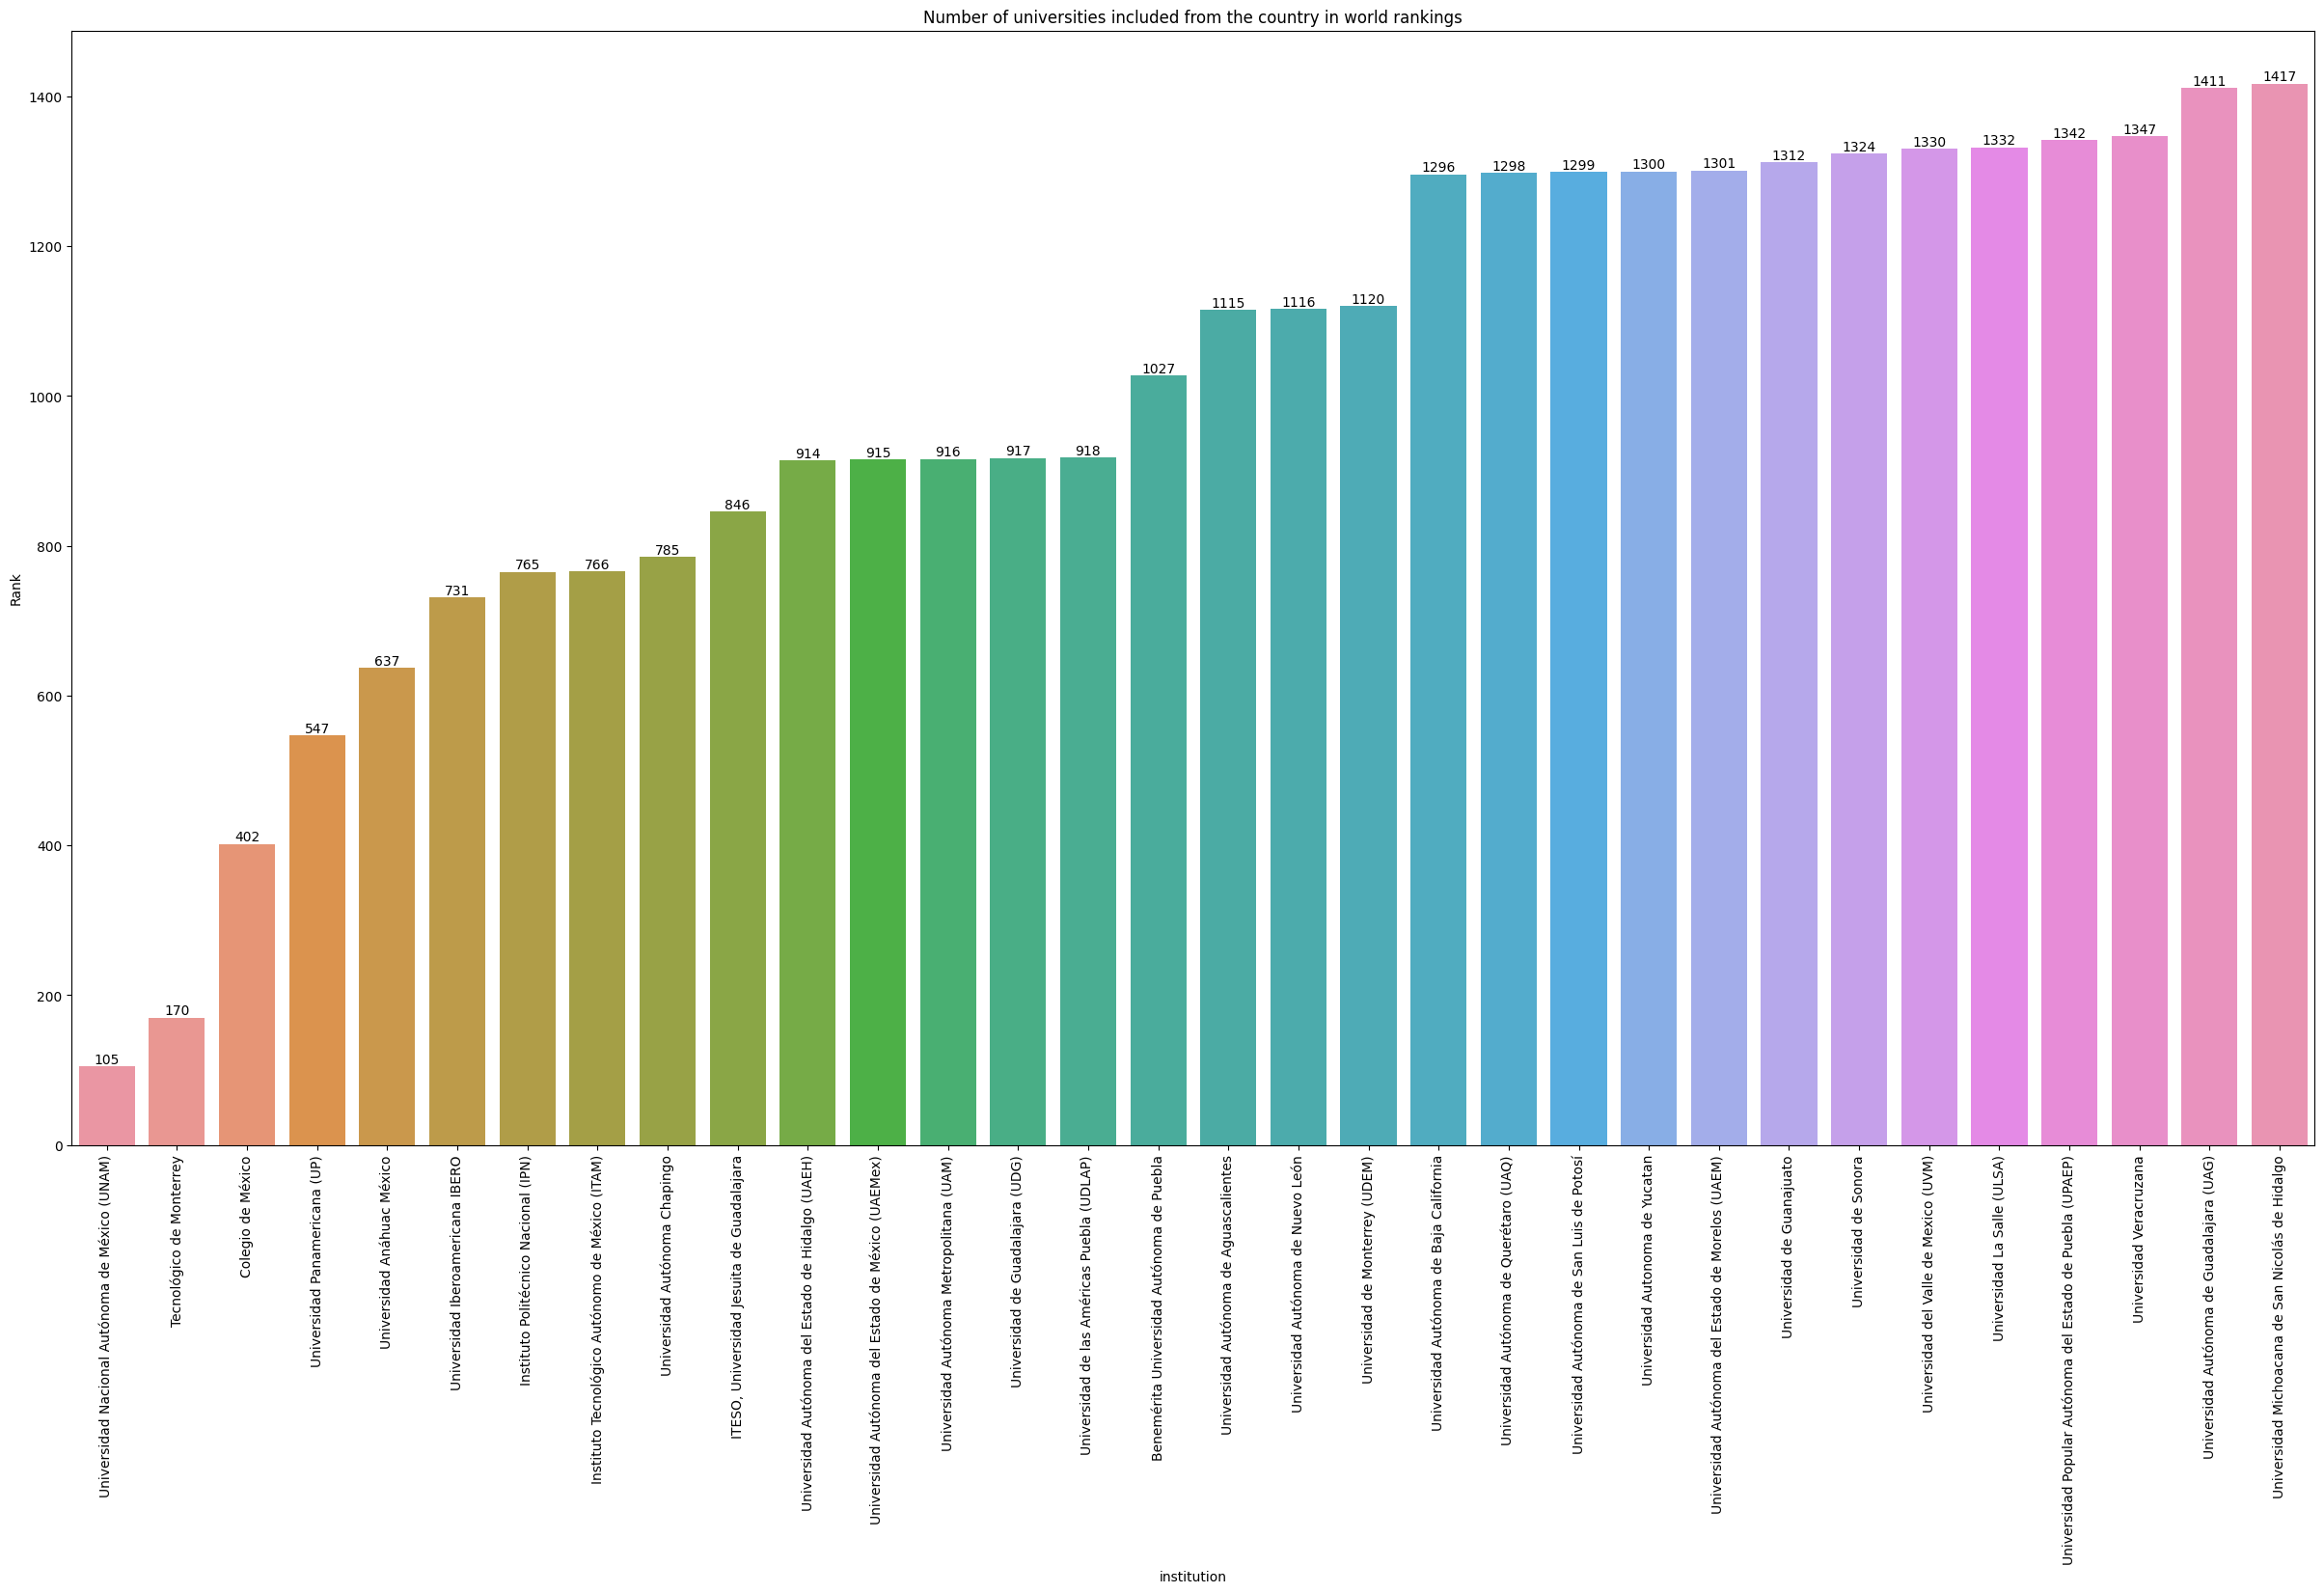

In [ ]:


plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='institution', y='Rank',data=mx)
ax.bar_label(ax.containers[0])

